In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from SIGNALscripts import plots
import SIGNALscripts.functions as f 

SIGNALscripts.config  loaded!
SIGNALscripts.notebooks loaded!


# Auswertung Residuallast-Signale
greift auf die Datei 'RES_pro_Stunde.csv' und die eingegebenen csv-Dateien der Schaltsignale zu.


## Inhalt
- Häufigkeiten
    - Anteil positiver/negativer Stunden insgesamt
    - Längste positive Phase/längste negative Phase
    - Phasenlängen von x Stunden negativ/positiv
- Zusammenhang mit der Residuallast
    - Häufigkeit Signal positiv und RES > 0 
    - Häufigkeit Signal negativ und RES < 0
 
### Input
- dateien: Namen der Dateien, die die Signale enthalten
- names: Namen, die später für die Identifikation in diesem Notebook verwendet werden können (Anzahl Dateinamen und Namen muss übereinstimmen)
Die Dateien, die importiert werden sollen, im folder "result_files" ablegen, der sich im gleichen Ordner wie das Notebook befindet (sofern es nicht die outputdateien des Auswertungs-Skripts sind). 

In [2]:
###
dateien = ['Schaltsignal_RES1.csv', 'Schaltsignal_RES2.csv', 'Schaltsignal_RES3.csv']
names = ['Signal 1', 'Signal 2', 'Signal 3']
resload = pd.read_csv('result_files/RES_pro_Stunde.csv', header = 1, names = ['snapshots', 'signal'])
###
sdf = f.import_func(dateien, names)

## Anforderungen an das Dataframe
- csv-file mit einer header-Zeile und zwei Spalten
    - erste Spalte: Index bzw. Datums- und Zeitangaben
    - zweite Spalte: Signal
- Signal: binäres Signal x mit $x \in [0,1]$
- mindestens 2 negative bzw. positive Einträge

**$\rightarrow$ Signal erfüllt die Anforderungen zur Auswertung:**

In [3]:
f.check_input(sdf[1])

True

## Häufigkeits-Analyse
### Allgemeine Statistik
- Anteil pos. Signal: gibt an, welchen Anteil der gesamt vergangenen Zeit ein positives Signal `1` gebracht wird. 
- Anteil neg. Signal: gibt an, welchen Anteil der gesamt vergangenen zeit ein negatives Signal `0` gebracht wird.
- Längstes pos. Signal: Gibt die längste Zeitdauer, die durchgehend ein positives Signal `1` erscheint, an
- Längstes neg. Signal: Gibt die längste Zeitdauer, die durchgehend ein negatives Signal `0`erscheint, an
- Mean neg. Signal: Mittelwert der Zeitdauern, die durchgehend ein negatives Signal `0` erscheint
- Mean pos. Signal: Mittelwert der Zeitdauern, die durchgebend ein positives Signal `1` erscheint

Alle größenbehafteten Angaben werden in Stunden angegeben.

In [4]:
f.statistics(sdf)

,Name,Anteil pos. Signal,Anteil neg. Signal,Längstes neg. Signal [h],Mean neg. Signal [h],Längstes pos. Signal [h],Mean pos. Signal [h]
0,Signal 1,0.46,0.54,284.0,25.69,200.0,22.51
1,Signal 2,0.48,0.52,20.0,5.07,29.0,4.78
2,Signal 3,0.62,0.38,19.0,4.11,190.0,6.74


### Zeitdauern eines durchgängigen Signals
Die Daten sind im DataFrame 'res' gespeichert und können mit der auskommentierten Zeile als csv gespeichert werden.

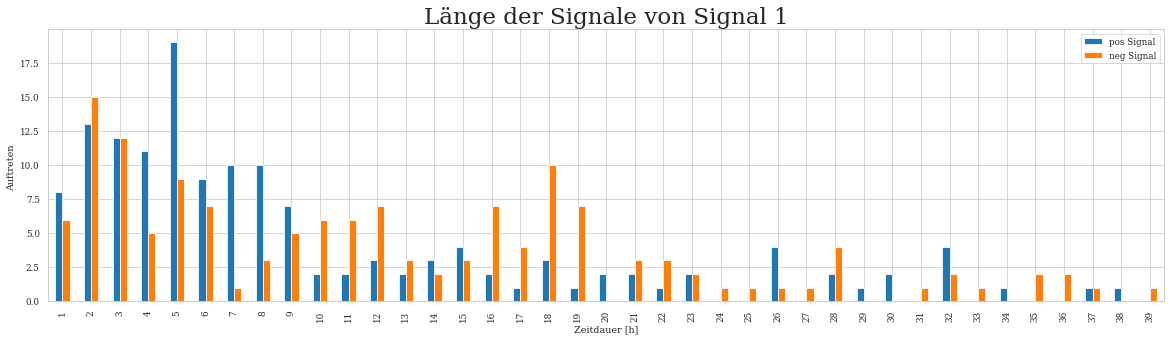

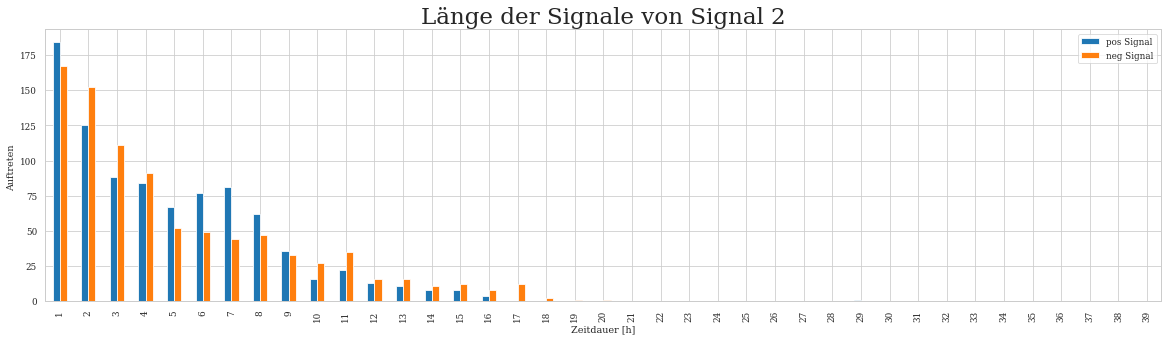

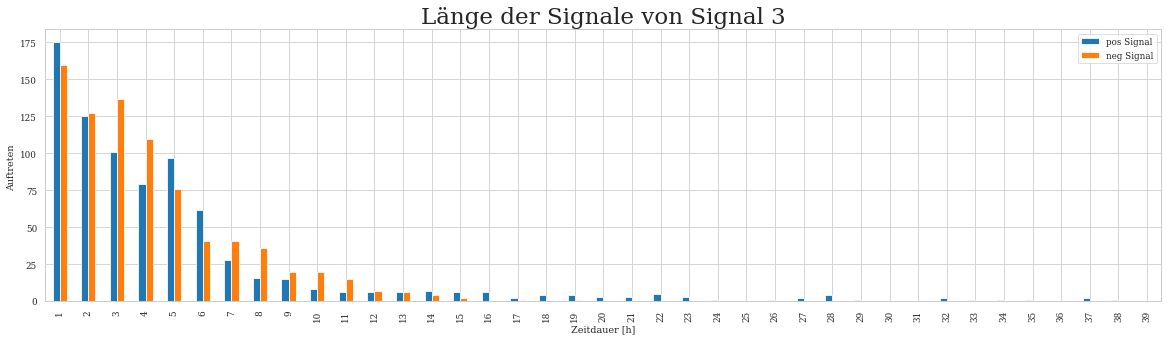

In [5]:
for i in range(0,len(sdf[1])):
    res = f.all_lengths(sdf[1][i]['signal'])
    res[1:40].plot(kind = 'bar', figsize=(20,5))
    plt.title('Länge der Signale von ' + sdf[0][i], fontsize = 23)
    plt.xlabel('Zeitdauer [h]')
    plt.ylabel('Auftreten ')
    #res.to_csv('pathtofolder/ZD_'+ sdf[0][i].csv)

## Zusammenhang mit der Residuallast
- Positives Signal RES > 0 gibt an, zu wie vielen Stunden das Schaltsignal positiv ist und die Residuallast ebenfalls
- Positives Signal RES < 0 gibt an, zu wie vielen Stunden das Schaltsignal positiv ist, die Residuallast hingegen negativ
- Negatives Signal RES > 0 gibt an, zu wie vielen Stunden das Schaltsignal negativ ist und die Residuallast positiv 
- Negatives Signal RES < 0 gibt an, zu wie vielen Stunden das Schaltsignal negativ ist und die die Residuallast positiv.
- Anteil neg. Signal RES < 0 gibt an, welcher Anteil der negativen Residuallast ein negatives Schaltsignal auslöst $\rightarrow$ sollte minimal sein
- Anteil pos. Singnal RES > 0 gibt an, welcher Anteil der positiven Residuallast ein positives Schaltsignal auslöst $\rightarrow$ abhängig von der Zeitreihe der Residuallast nicht zu klein

In [6]:
f.signal_res(sdf, resload)

,Name,Pos. Signal RES > 0,Pos. Signal RES < 0,Neg. Signal RES > 0,Neg. Signal RES < 0,Anteil neg. Signal RES < 0,Anteil pos. Signal RES > 0
0,Signal 1,232.0,3805.0,4494.0,228.0,0.057,0.049
1,Signal 2,1669.0,6634.0,7783.0,1432.0,0.178,0.177
2,Signal 3,3238.0,10494.0,10940.0,1605.0,0.133,0.228
